<a href="https://colab.research.google.com/github/jainmridul82/Neural-Networks/blob/main/BatchNorm_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline

1.   Load dataset and visualise
2.   Add batchnorm layers
3.   Comparison with and without batchnorm layers
4.   Add dropout layer
5.   Comparison with and without dropout layer









In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import seaborn as sns

# Dataset and visualisation

In [ ]:
transform_train=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

In [ ]:
trainset=torchvision.datasets.MNIST(root="./data",train=True,
                                    download=True,
                                    transform=torchvision.transforms.ToTensor())

In [ ]:
batch_size=4

In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [ ]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

In [ ]:
print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
3


In [ ]:
def imshow(img,title):

  plt.figure(figsize=(batch_size*4,4))
  plt.axis("off")
  plt.imshow(np.transpose(img,(1,2,0)))
  plt.title(title)
  plt.show()

In [ ]:
def show_batch_images(dataloader):

  images,labels=next(iter(dataloader))

  img=torchvision.utils.make_grid(images)
  imshow(img,title=[str(x.item()) for x in labels])

  return images,labels

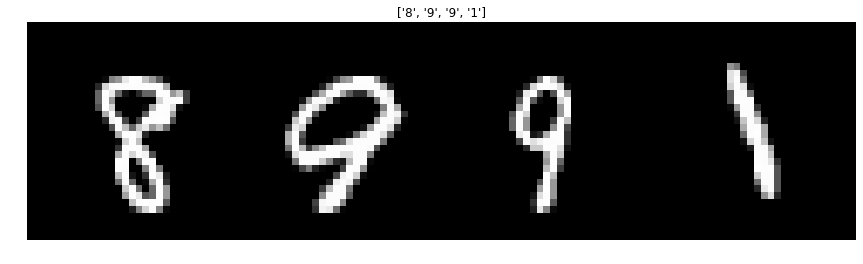

In [ ]:
images,labels=show_batch_images(trainloader)

# BatchNorm

In [ ]:
class MyNet(torch.nn.Module):

  def __init__(self):
    super(MyNet,self).__init__()
    self.classifier=torch.nn.Sequential(
        torch.nn.Linear(784,48), # 28*28=784
        torch.nn.ReLU(),
        torch.nn.Linear(48,24),
        torch.nn.ReLU(),
        torch.nn.Linear(24,10),
    )

  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=self.classifier(x)
    return x

In [ ]:
class MyNetBN(torch.nn.Module):

  def __init__(self):
    super(MyNetBN,self).__init__()
    self.classifier=torch.nn.Sequential(
        torch.nn.Linear(784,48),
        torch.nn.BatchNorm1d(48),
        torch.nn.ReLU(),
        torch.nn.Linear(48,24),
        torch.nn.BatchNorm1d(24),
        torch.nn.ReLU(),
        torch.nn.Linear(24,10),
    )

  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=self.classifier(x)
    return x

In [ ]:
model=MyNet()
print(model)

MyNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [ ]:
model_bn=MyNetBN()
print(model_bn)

MyNetBN(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [ ]:
batch_size=512

In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [ ]:
loss_fn=torch.nn.CrossEntropyLoss()
opt=torch.optim.Adam(model.parameters(),lr=0.01)
opt_bn=torch.optim.Adam(model_bn.parameters(),lr=0.01)

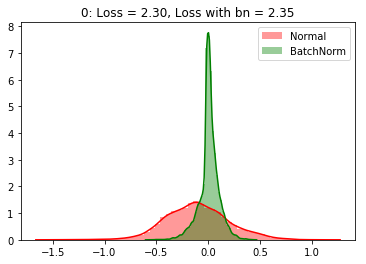

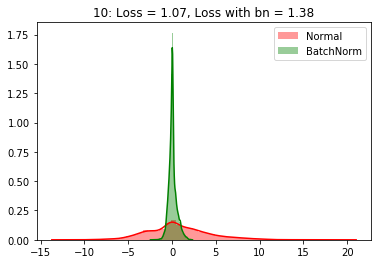

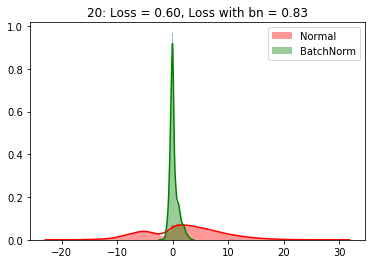

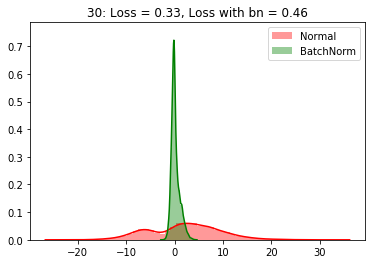

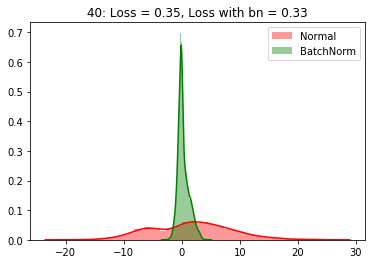

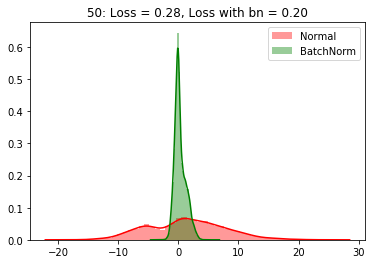

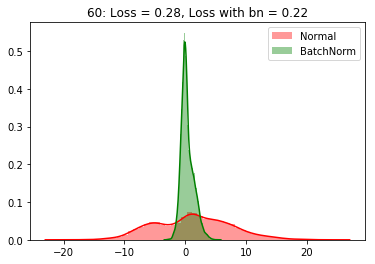

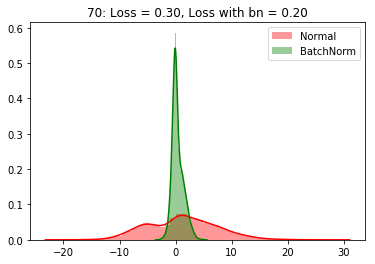

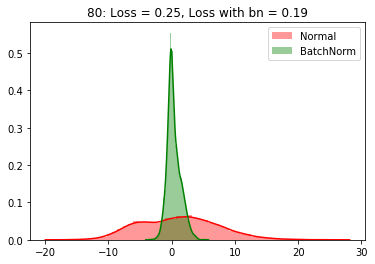

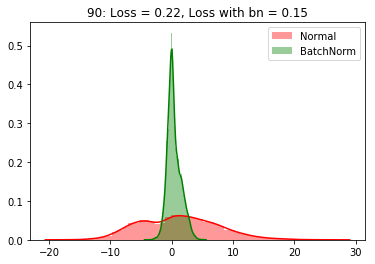

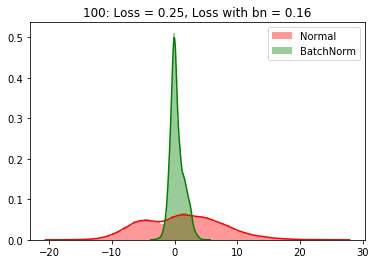

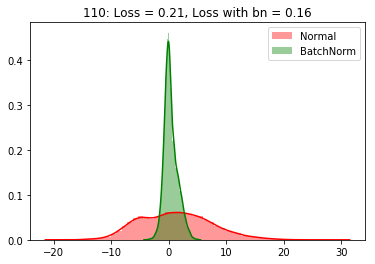

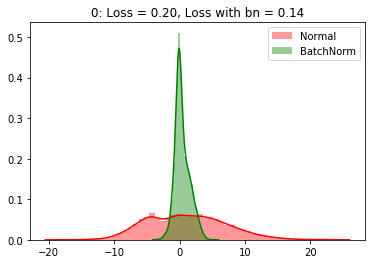

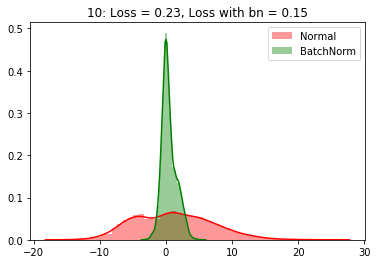

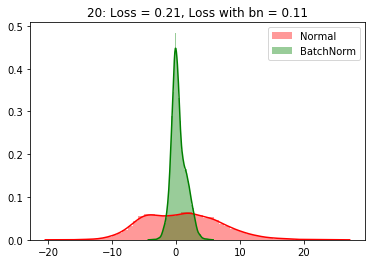

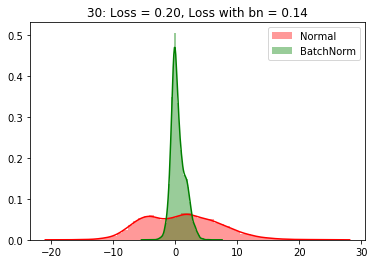

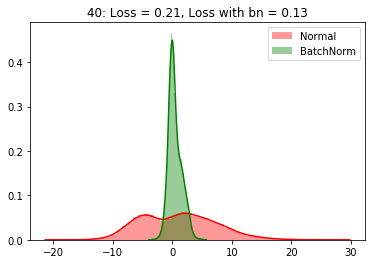

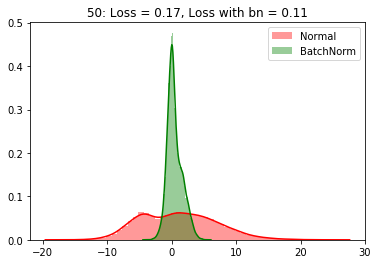

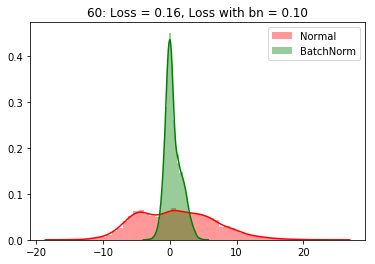

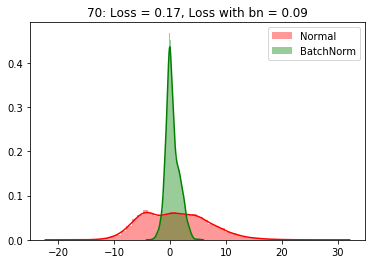

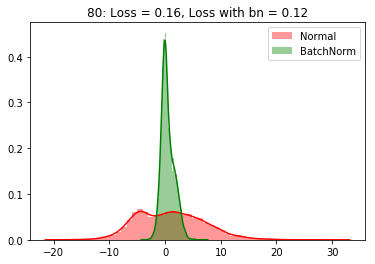

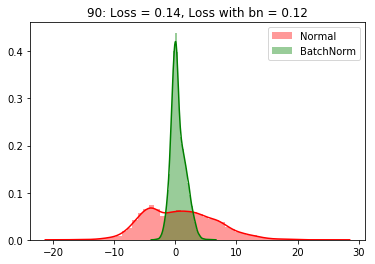

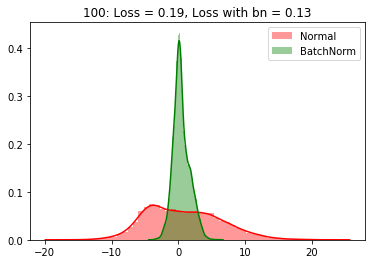

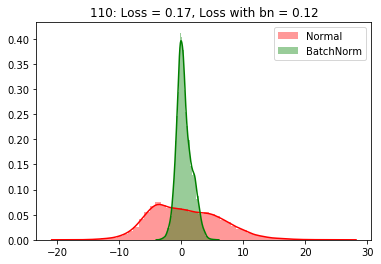

------------------------


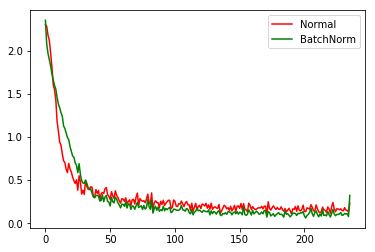

In [ ]:
loss_arr=[]
loss_bn_arr=[]

max_epochs=2

for epoch in range(max_epochs):

  for i,data in enumerate(trainloader,0):

    inputs,labels=data

    # training steps for normal model
    opt.zero_grad()
    outputs=model(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()

    # training steps for bn model
    opt_bn.zero_grad()
    outputs_bn=model_bn(inputs)
    loss_bn=loss_fn(outputs_bn,labels)
    loss_bn.backward()
    opt_bn.step()

    loss_arr.append(loss.item())
    loss_bn_arr.append(loss_bn.item())

    if i%10==0:

      inputs=inputs.view(inputs.size(0),-1)

      model.eval() # eval mode halts the learning of mean and SD
      model_bn.eval() # and uses the learnt values to scale the data

      a=model.classifier[0](inputs)
      a=model.classifier[1](a)
      a=model.classifier[2](a)
      a=a.detach().numpy().ravel()
      sns.distplot(a,kde=True,color='r',label='Normal')

      b=model_bn.classifier[0](inputs)
      b=model_bn.classifier[1](b)
      b=model_bn.classifier[2](b)
      b=model_bn.classifier[3](b)
      b=model_bn.classifier[4](b)
      b=b.detach().numpy().ravel()
      sns.distplot(b,kde=True,color='g',label="BatchNorm")

      plt.title("%d: Loss = %0.2f, Loss with bn = %0.2f"%(i,loss.item(),loss_bn.item()))
      plt.legend()
      plt.show()
      plt.pause(0.5)

      model.train()
      model_bn.train()

print("------------------------")

plt.plot(loss_arr,'r',label='Normal')
plt.plot(loss_bn_arr,'g',label='BatchNorm')
plt.legend()
plt.show()

In [ ]:
class CNN_BN(torch.nn.Module):

  def __init__(self):
    super(CNN_BN,self).__init__()
    self.features=torch.nn.Sequential(
        torch.nn.Conv2d(1,3,5),
        torch.nn.BatchNorm2d(3),
        torch.nn.ReLU(),
        torch.nn.AvgPool2d(2,stride=2),
        torch.nn.Conv2d(3,6,3),
        torch.nn.BatchNorm2d(6),
    )
    self.features1=torch.nn.Sequential(
        torch.nn.ReLU(),
        torch.nn.AvgPool2d(2,stride=2),
    )
    self.classifier=torch.nn.Sequential(
        torch.nn.Linear(150,25),
        torch.nn.ReLU(),
        torch.nn.Linear(25,10),
    )

  def forward(self,x):

    x=self.features(x)
    x=self.features1(x)
    x=x.view(x.size(0),-1)
    x=self.classifier(x)
    return x

In [ ]:
x=CNN_BN()
print(x)

CNN_BN(
  (features): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (features1): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Linear(in_features=150, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=10, bias=True)
  )
)


# Dropout

In [ ]:
import numpy as np
import torch

N=50
noise=0.3

X_train=torch.unsqueeze(torch.linspace(-1,1,N),1)
Y_train=X_train+noise*torch.normal(torch.zeros(N,1),torch.ones(N,1))

X_test=torch.unsqueeze(torch.linspace(-1,1,N),1)
Y_test=X_test+noise*torch.normal(torch.zeros(N,1),torch.ones(N,1))

In [ ]:
print(X_train.shape)
print(X_test.shape)

torch.Size([50, 1])
torch.Size([50, 1])


In [ ]:
print(X_train)

tensor([[-1.0000],
        [-0.9592],
        [-0.9184],
        [-0.8776],
        [-0.8367],
        [-0.7959],
        [-0.7551],
        [-0.7143],
        [-0.6735],
        [-0.6327],
        [-0.5918],
        [-0.5510],
        [-0.5102],
        [-0.4694],
        [-0.4286],
        [-0.3878],
        [-0.3469],
        [-0.3061],
        [-0.2653],
        [-0.2245],
        [-0.1837],
        [-0.1429],
        [-0.1020],
        [-0.0612],
        [-0.0204],
        [ 0.0204],
        [ 0.0612],
        [ 0.1020],
        [ 0.1429],
        [ 0.1837],
        [ 0.2245],
        [ 0.2653],
        [ 0.3061],
        [ 0.3469],
        [ 0.3878],
        [ 0.4286],
        [ 0.4694],
        [ 0.5102],
        [ 0.5510],
        [ 0.5918],
        [ 0.6327],
        [ 0.6735],
        [ 0.7143],
        [ 0.7551],
        [ 0.7959],
        [ 0.8367],
        [ 0.8776],
        [ 0.9184],
        [ 0.9592],
        [ 1.0000]])


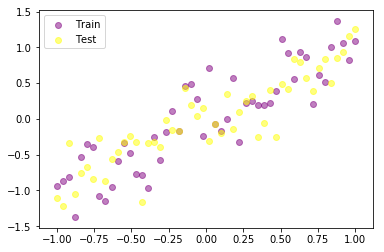

In [ ]:
plt.scatter(X_train.data.numpy(),Y_train.data.numpy(),c="purple",alpha=0.5,label="Train")
plt.scatter(X_test.data.numpy(),Y_test.data.numpy(),c="yellow",alpha=0.5,label="Test")
plt.legend()
plt.show()

In [ ]:
N_h=100

model=torch.nn.Sequential(
    torch.nn.Linear(1,N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,1),
)

model_dropout=torch.nn.Sequential(
    torch.nn.Linear(1,N_h),
    torch.nn.Dropout(0.9),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,N_h),
    torch.nn.Dropout(0.9),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,1),
)

In [ ]:
opt=torch.optim.Adam(model.parameters(),lr=0.01)
opt_dropout=torch.optim.Adam(model_dropout.parameters(),lr=0.01)
loss_fn=torch.nn.MSELoss()

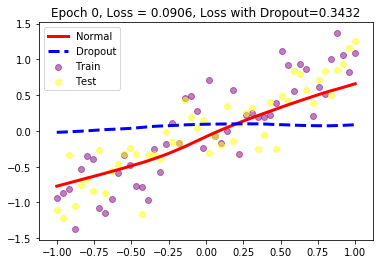

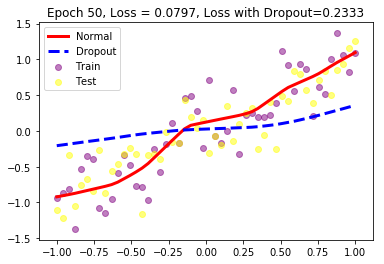

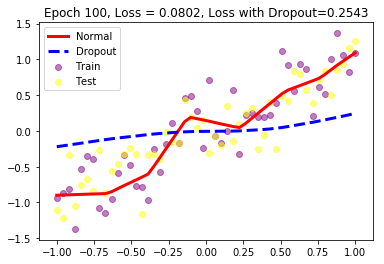

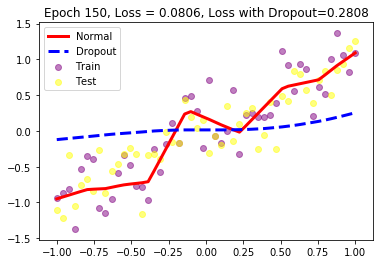

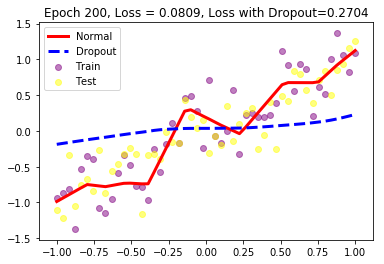

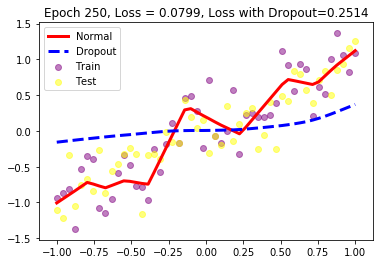

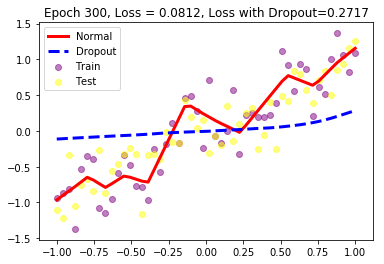

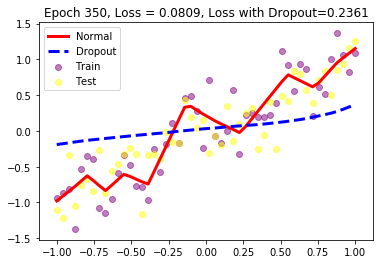

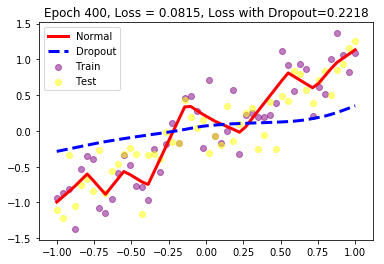

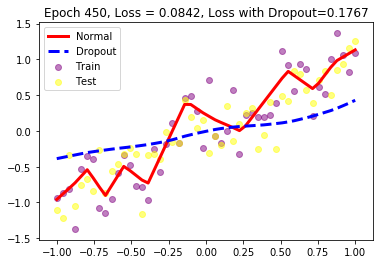

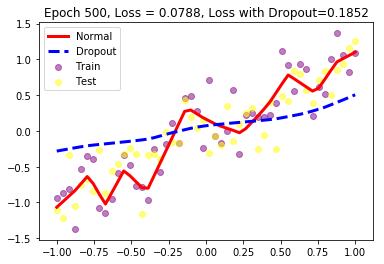

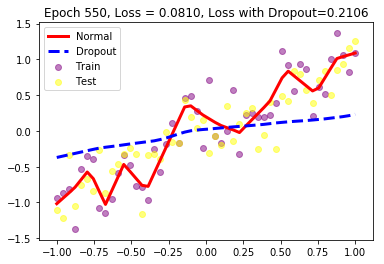

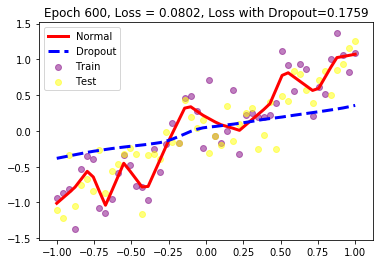

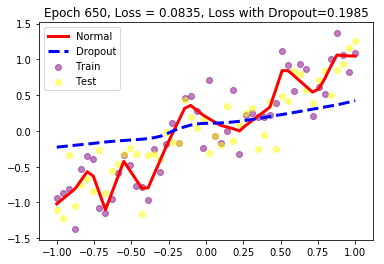

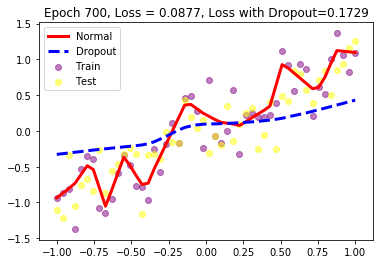

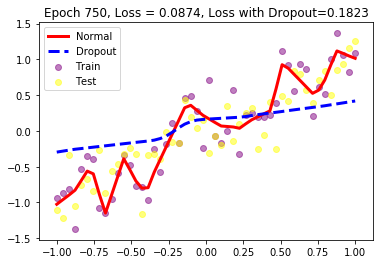

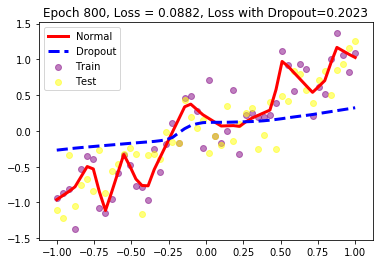

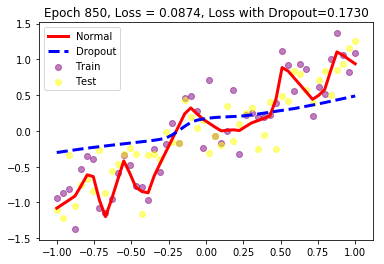

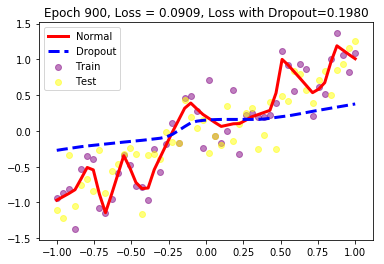

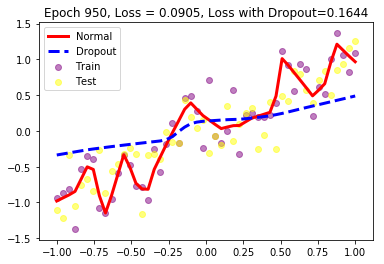

In [ ]:
max_epochs=1000

for epoch in range(max_epochs):

  pred=model(X_train)
  loss=loss_fn(pred,Y_train)
  opt.zero_grad()
  loss.backward()
  opt.step()

  pred_dropout=model_dropout(X_train)
  loss_dropout=loss_fn(pred_dropout,Y_train)
  opt_dropout.zero_grad()
  loss_dropout.backward()
  opt_dropout.step()

  if epoch%50==0:

    model.eval()
    model_dropout.eval()

    test_pred=model(X_test)
    test_loss=loss_fn(test_pred,Y_test)

    test_pred_dropout=model_dropout(X_test)
    test_loss_dropout=loss_fn(test_pred_dropout,Y_test)

    plt.scatter(X_train.data.numpy(),Y_train.data.numpy(),c="purple",alpha=0.5,label="Train")
    plt.scatter(X_test.data.numpy(),Y_test.data.numpy(),c="yellow",alpha=0.5,label="Test")
    plt.plot(X_test.data.numpy(),test_pred.data.numpy(),"r-",lw=3,label="Normal")
    plt.plot(X_test.data.numpy(),test_pred_dropout.data.numpy(),"b--",lw=3,label="Dropout")

    plt.title("Epoch %d, Loss = %0.4f, Loss with Dropout=%0.4f"%(epoch,test_loss,test_loss_dropout))

    plt.legend()

    model.train()
    model_dropout.train()

    plt.pause(0.05)

# Exercises

1.   Try out BatchNorm2d with MNIST dataset on a CNN
2.   Ttry Dropout on a CNN with CIFAR10
3.   Think of how to create a dataset which can suffer from large batch variation and/or overfitting
4.   Try out BatchNorm and Dropout networks for such dataset

